# Train Data Cleaning part

# Titanic - Machine Learning from Disaster

**Predict survival on the Titanic and get familiar with ML basics**



# Step 1: Business Problem Understanding

**Predict survival on the Titanic and get familiar with ML basics**

# Step 2: Data Understanding

* Understand every variable
* Data Exploration
* EDA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\Datascience\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# continous
**For continuous features, use describe().**

**describe() provides summary statistics for continuous data, including:**

1. count
2. mean
3. std (standard deviation)
4. min
5. 25% (first quartile)
6. 50% (median)
7. 75% (third quartile)
8. max

# Categorical Data
**value_counts(), Unique() is suitable for categorical data, providing the frequency of each unique value.**

# Discrete Count
**For count data (discrete numerical values), you can use either describe() or value_counts(), unique depending on your goals:**

value_counts():

Displays the frequency distribution of count values:

Unique count values
Frequency of each count value

**Drop unimportant columns as per feature selection (Filter Methods)**

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
continous=['Age','Fare']

discrete_categorical =[ 'Sex','Embarked']

discrete_count=['Survived', 'Pclass','SibSp','Parch']

In [6]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df['Survived'].unique() # discrete_count

array([0, 1], dtype=int64)

In [9]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
df['Pclass'].unique()  # discrete_count

array([3, 1, 2], dtype=int64)

In [11]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
df['Sex'].unique() # discrete_categorical

array(['male', 'female'], dtype=object)

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
df['SibSp'].unique() # discrete_count

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [15]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [16]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [17]:
df['Parch'].unique()  # discrete_count

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [19]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [20]:
df['Embarked'].unique() # Here it is nan we have to modifie

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df['Embarked'].value_counts() # discrete_categorical

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [22]:
df["Age"].describe() # continous

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
df["Fare"].describe() # continous

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [25]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [26]:
continous=['Age','Fare']

discrete_categorical =[ 'Sex','Embarked']

discrete_count=['Survived', 'Pclass','SibSp','Parch']

In [27]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Exploratory Data Analysis (EDA)

**for continous variables**

In [28]:
df[continous].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [29]:
df[continous].skew() 

Age     0.389108
Fare    4.787317
dtype: float64

**Normal distrbution must be -1 to 1**

**Right skew must be positive**

**left skew always must be negative**

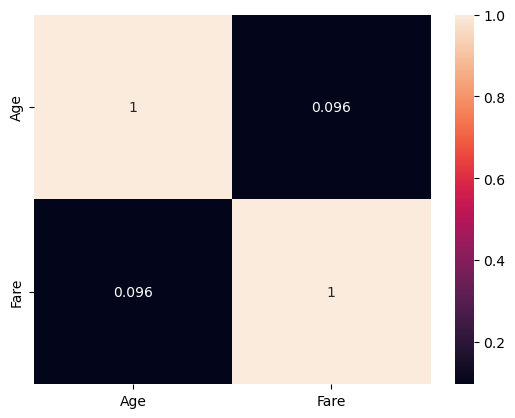

In [30]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

In [31]:
df[continous].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


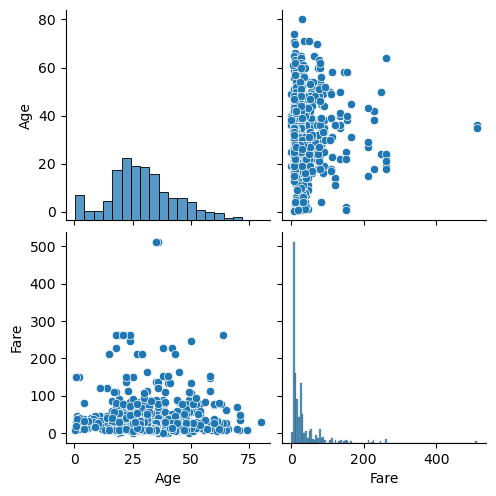

In [32]:
sns.pairplot(df[continous])
plt.show()

# Boxcox

In [33]:
from scipy import stats
df["Fare"],param=stats.boxcox(df.Fare+0.01)
print(" λ=",param)
df["Fare"].skew()

 λ= 0.18091321955494596


0.25282461235568676

**for Discrete variables**

In [36]:
df[discrete_categorical].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


**Check for Missing values**

In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**check for Skewness**

In [38]:
df[continous].skew()

Age     0.389108
Fare    0.252825
dtype: float64

**check outliers**

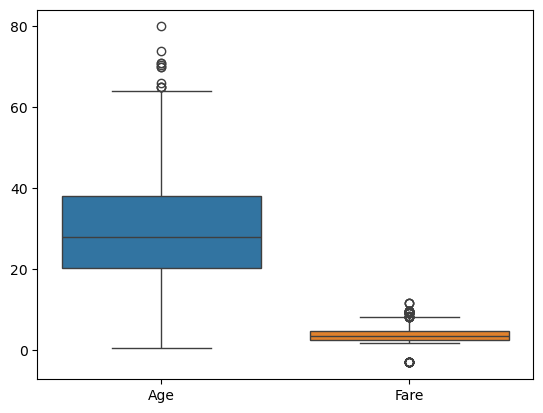

In [39]:
sns.boxplot(df[continous])
plt.show()

# Stage - 3 : Data Preparation

**1. Data Cleaning**

. Wrong data

. Missing values

. wrong data type

. duplicates

. outliers

**2. Data Wrangling**

. transformation ( applicable on continous)

. scaling (application on continous)

. encoding ( application on discrete categorical)

**Note**

****Dont apply any Data Wrangling technique on count variable****

***Wrong Data treatment***

In [40]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.384456,S
1,1,1,female,38.0,1,0,6.433577,C
2,1,3,female,26.0,0,0,2.512739,S
3,1,1,female,35.0,1,0,5.813111,S
4,0,3,male,35.0,0,0,2.535507,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,3.265085,S
887,1,1,female,19.0,0,0,4.700392,S
888,0,3,female,NaN,1,2,4.254769,S
889,1,1,male,26.0,0,0,4.700392,C


In [41]:
df.duplicated().sum()

111

In [42]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Missing values Treatment**

In [43]:
df["Age"]=df["Age"].fillna(df["Age"].median())  # Here there is outlayers so we used median for Age
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [44]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0]) # It is catigorical so we used here mode

In [45]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Outliers Treatment

 **Note**
 
***Outliers should be retrained***

**Encoding** 

In [47]:
df['Sex']=df['Sex'].replace({"male":1,"female":0})
df[ 'Embarked']=df[ 'Embarked'].replace({"C":0,"Q":1,"S":2})

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.384456,2
1,1,1,0,38.0,1,0,6.433577,0
2,1,3,0,26.0,0,0,2.512739,2
3,1,1,0,35.0,1,0,5.813111,2
4,0,3,1,35.0,0,0,2.535507,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,3.265085,2
887,1,1,0,19.0,0,0,4.700392,2
888,0,3,0,28.0,1,2,4.254769,2
889,1,1,1,26.0,0,0,4.700392,0


In [49]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Random Score

In [50]:
x=df.drop("Survived",axis=1)
y=df['Survived']

In [51]:
train=[]
test=[]
cv=[]

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state =i)

    from sklearn.linear_model import LinearRegression
    l = LinearRegression()
    l.fit(x_train,y_train)
    
    train_score = l.score(x_train,y_train)
    test_score = l.score(x_test,y_test)
    
    train.append(train_score)
    test.append(test_score)
    
#     y_pred_train = l.predict(x_train,y_train)
#     y_pred_test = l.predict(x_test,y_test)

#     train.append(l.score(y_pred_train))
#     test.append(l.score(y_pred_test))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="r2").mean())
    
em = pd.DataFrame({"train": train,"test": test,"cv":cv})
gm = em[(abs(em["train"]-em["test"])<=0.05)&(abs(em["test"]-em["cv"])<=0.05)]
print("best_random_number:",gm[gm["cv"]==gm["cv"].max()].index.to_list()[0])

best_random_number: 48


In [52]:
df.to_excel("cleande.xlsx")

In [53]:
pwd

'C:\\Users\\abhis\\DATA SCIENCE SUBJECT & AI\\kaggal projects\\Titanic Project (classification)(Binary)'